## Observations and Insights 

In [128]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data=pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID","Mouse ID"])
merged_data.head()

# Display the data table for preview

organized_merged_data=merged_data[["Mouse ID", "Timepoint", "Drug Regimen", "Sex", "Age_months", "Weight (g)", "Tumor Volume (mm3)", "Metastatic Sites"]]
organized_merged_data.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,k403,0,Ramicane,Male,21,16,45.000000,0
1,k403,5,Ramicane,Male,21,16,38.825898,0
2,k403,10,Ramicane,Male,21,16,35.014271,1
3,k403,15,Ramicane,Male,21,16,34.223992,1
4,k403,20,Ramicane,Male,21,16,32.997729,1


In [129]:
# Checking the number of mice.
unique_mice=organized_merged_data['Mouse ID'].unique()
no_unique_mice=len(unique_mice)
print(f"There are {no_unique_mice} mices.")

There are 249 mices.


In [130]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_ID = merged_data.loc[merged_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice_ID


array(['g989'], dtype=object)

In [131]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = merged_data.loc[merged_data['Mouse ID'] == "g989",:]
duplicate_mouse.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [132]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_data[merged_data['Mouse ID'].isin(dup_mice_ID)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [133]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df["Mouse ID"].nunique()

print(f'There are {clean_mice} mices')

There are 248 mices


## Summary Statistics

In [134]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_groups = merged_data.groupby(["Drug Regimen"])
drug_groups = merged_data.groupby(["Drug Regimen"])
# Calculate mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Get average/mean of tumor volume
Average_tv = round(drug_groups["Tumor Volume (mm3)"].mean(),2)

# Get the median of tumor volume
Median_tv = round(drug_groups["Tumor Volume (mm3)"].median(),2)

# Get the variance of tumor volume
Variance_tv = round(drug_groups["Tumor Volume (mm3)"].var(),2)

#Get the standard deviation of tumor volume
Sdev_tv = round(drug_groups["Tumor Volume (mm3)"].std(),2)

#Get the SEM of tumor volume
SEM_tv = round(drug_groups["Tumor Volume (mm3)"].sem(),2)

#Create a new dataframe with new information

summary1_df = pd.DataFrame({ "Mean":Average_tv, 
                                    "Median ": Median_tv, 
                                    "Variance": Variance_tv, 
                                    "Standard Deviation ": Sdev_tv,
                                     "SEM  ":SEM_tv
    
    
})

summary1_df

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

regimen_mean = merged_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
regimen_mean

regimen_median = merged_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
regimen_median

regimen_variance = merged_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
regimen_variance

regimen_stdev = merged_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
regimen_stdev

regimen_sem = merged_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
regimen_sem


# Assemble the resulting series into a single summary dataframe.
summary_stats = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, 
                               "Standard Deviation": regimen_stdev, "SEM": regimen_sem})
summary_stats





,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [152]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats2 = merged_data.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]

summary_stats2 = summary_stats2.rename(columns={"mean":"Mean", "median": "Median", "var": "Variance", 
                                                "std": "Standard Deviation", "sem": "SEM"})

summary_stats2

/var/folders/sc/splzl2bd3752c4n_tcrh4qlm0000gn/T/ipykernel_20484/874344059.py:4: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  summary_stats2 = merged_data.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Time Points for Each Drug Regimen')

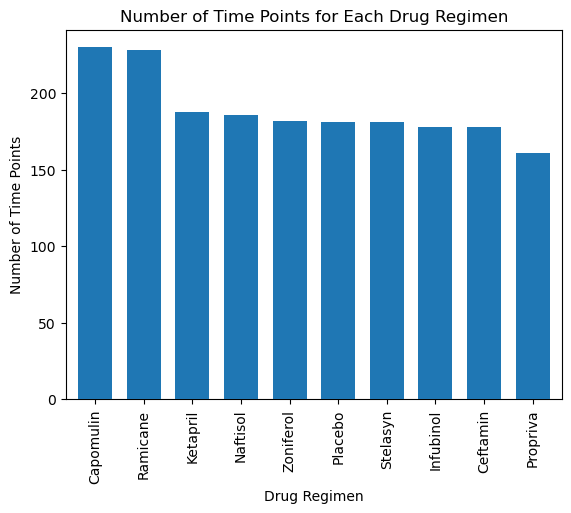

In [ ]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Plot a bar chart (.plot.bar()) based on the amount of data points (.value_counts())
# for each treatment regimen (data_df['Drug Regimen'])
bar_plot = merged_data['Drug Regimen'].value_counts().plot.bar(width=0.7, zorder=3)

# Set labels for axes
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Number of Time Points")
bar_plot.set_title("Number of Time Points for Each Drug Regimen")






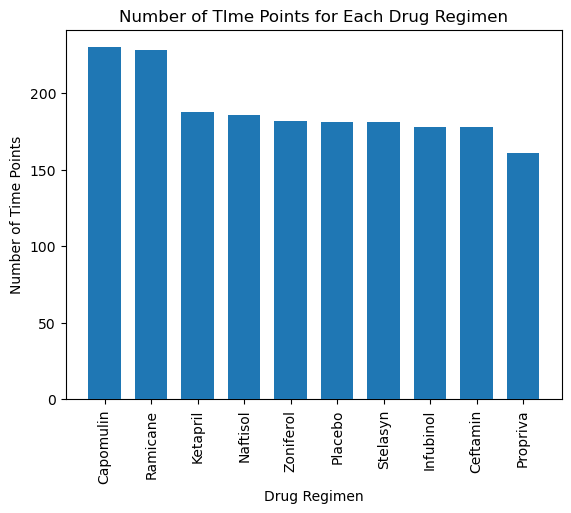

In [ ]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
import numpy as np

# Calculate the amount of data points for each drug regimen
counts = merged_data['Drug Regimen'].value_counts()

# Set the x_axis to the length of the 'counts' series
x_axis = np.arange(len(counts))

# Generate a bar blot with the length of the 'counts' series
# as the amount of values on the x axis, and the corresponding values
# in the series as the y values
plt.bar(x_axis, counts, width = 0.7, zorder=3)

# Label the tick marks according to the index values in the 'counts' series
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, counts.index.values)

# Rotate tick marks 90 degrees for visibility
plt.xticks(rotation=90)

# Set labels for axes
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Time Points")
plt.title('Number of TIme Points for Each Drug Regimen')



# Display resulting plot
plt.show()


Text(0, 0.5, '')

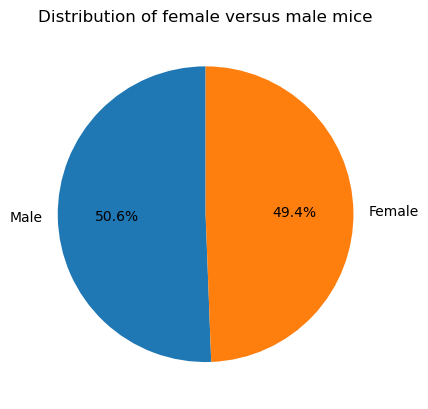

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Identify distribution of data by sex
data = merged_data['Sex'].value_counts()

# Plot a pie chart filled with corresponding percentages and displayed vertically
pie_plot = data.plot.pie(autopct="%1.1f%%", startangle=90, title='Distribution of female versus male mice')

# Hide the 'y' label
pie_plot.set_ylabel('')


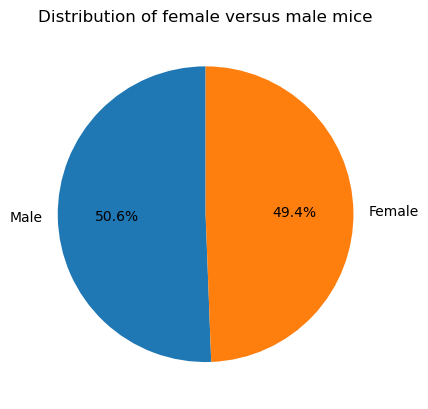

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

data = merged_data['Sex'].value_counts()

# Tell matplotlib to create a pie chart filled with corresponding percentages and displayed vertically
plt.pie(data, labels=data.index.values, autopct="%1.1f%%", startangle=90)
plt.title('Distribution of female versus male mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor=clean_df.loc[(clean_df["Drug Regimen"]=="Capomulin")|(clean_df["Drug Regimen"]=="Ramicane")|(clean_df["Drug Regimen"]=='Infubinol')|
                            (clean_df["Drug Regimen"]=='Ceftamin')]
# Start by getting the last (greatest) timepoint for each mouse
final_tumor=final_tumor.groupby(["Drug Regimen","Mouse ID"])["Timepoint"].max().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor=pd.merge(final_tumor,clean_df[["Mouse ID","Timepoint","Tumor Volume (mm3)"]],on=["Mouse ID","Timepoint"],how="left")
final_tumor

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
95,Ramicane,s508,45,30.276232
96,Ramicane,u196,45,40.667713
97,Ramicane,w678,5,43.166373
98,Ramicane,y449,15,44.183451


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Total_tumor_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_tumor.loc[final_tumor["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    Total_tumor_vol.append(tumor_vol)
    
    
    # Determine outliers using upper and lower bounds
quartiles = tumor_vol.quantile([.25, .5, .75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq - lowerq 
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
print(f"For {drug}, the outliers are: {outliers}")
    

For Ceftamin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


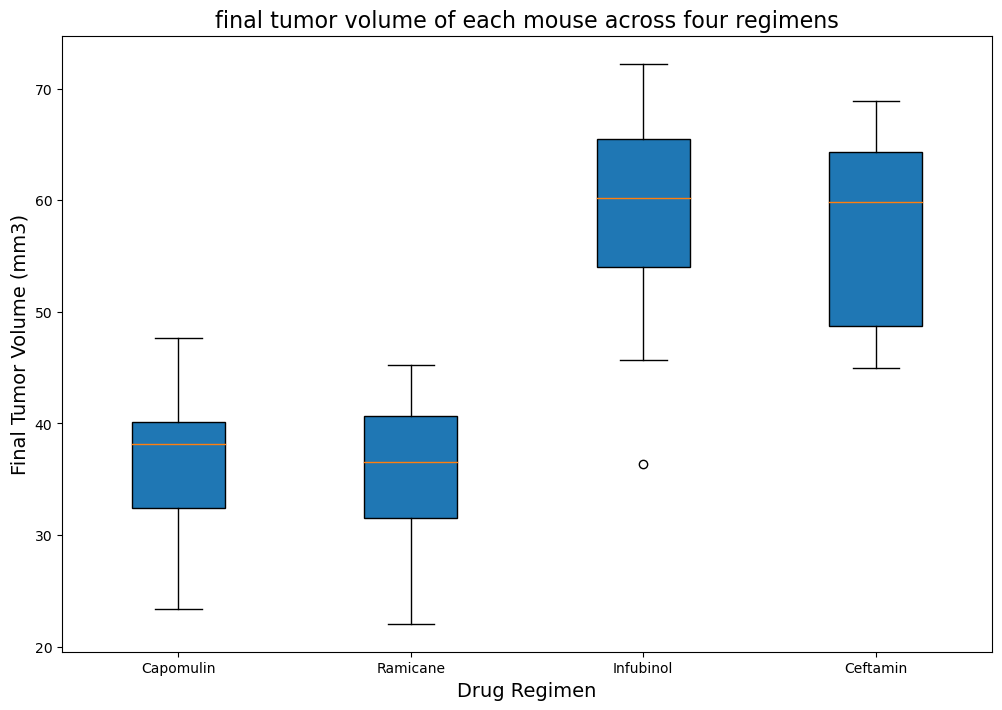

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.set_title('final tumor volume of each mouse across four regimens',fontsize =16)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(Total_tumor_vol, labels=treatments, widths = 0.4, patch_artist=True,vert=True)
plt.show()

## Line and Scatter Plots

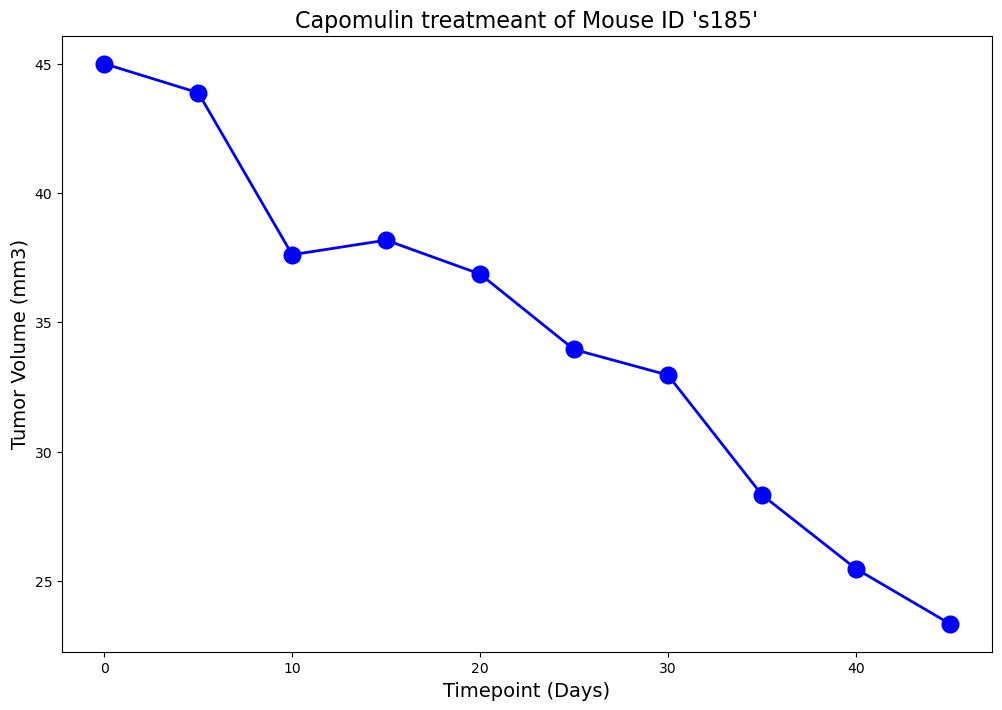

In [137]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin",:]
capomulin_df
x_axis = mouce_in_capomulin["Timepoint"]
tumor_volume = mouce_in_capomulin["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.title("Capomulin treatmeant of Mouse ID 's185'",fontsize =16)
plt.plot(x_axis, tumor_volume,linewidth=2, markersize=12,marker="o",color="blue", label="mm3")
plt.xlabel("Timepoint (Days)",fontsize =14)
plt.ylabel("Tumor Volume (mm3)",fontsize =14)
plt.show()

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouce_in_capomulin = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185",:]
mouce_in_capomulin


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


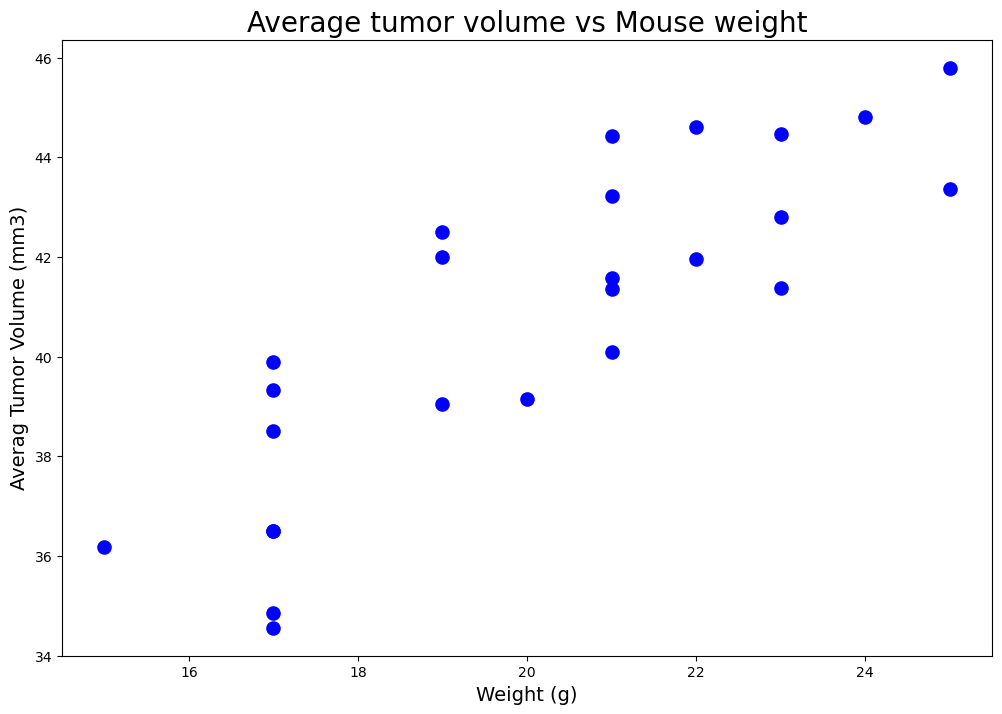

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


In [ ]:
# Scatter plot
avg_capom_df = capomulin_df.groupby(['Mouse ID']).mean()
fig1, ax1 = plt.subplots(figsize=(12, 8))
marker_size=14
plt.scatter(avg_capom_df['Weight (g)'],avg_capom_df['Tumor Volume (mm3)'],s=90, color="blue")
plt.title("Average tumor volume vs Mouse weight",fontsize =20)
plt.xlabel("Weight (g)",fontsize =14)
plt.ylabel("Averag Tumor Volume (mm3)",fontsize =14)


plt.show()

avg_capom_df.head()


## Correlation and Regression

The correlation between mouse weight and average tumor volume is: 0.84


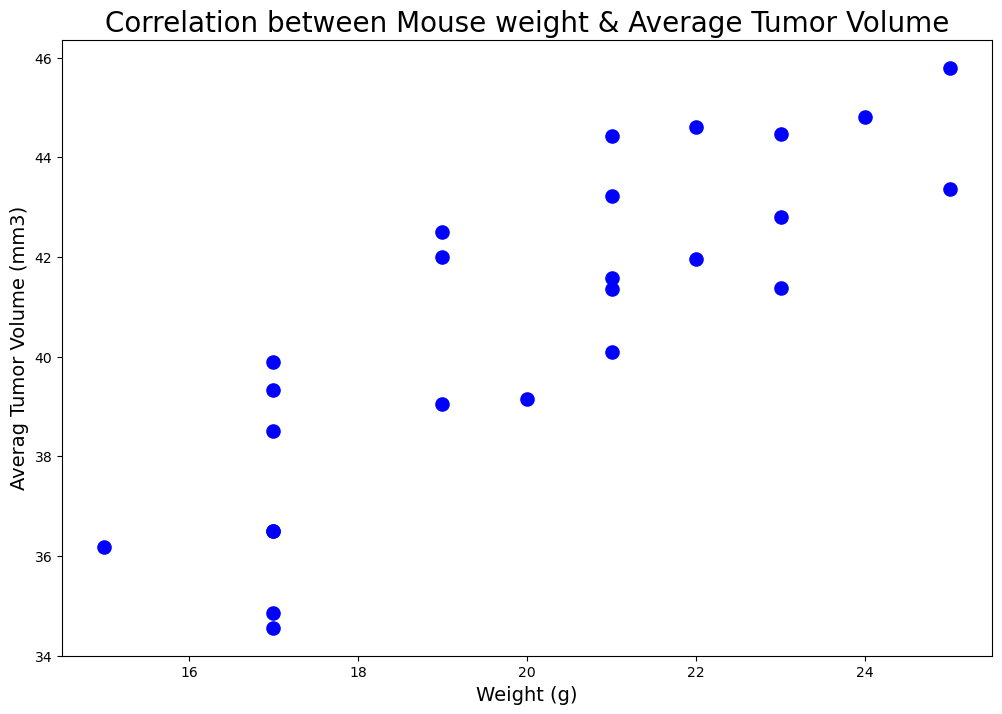

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(avg_capom_df['Weight (g)'],avg_capom_df['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is: {correlation}")

fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.scatter(avg_capom_df['Weight (g)'],avg_capom_df['Tumor Volume (mm3)'],s=90, color="blue")
plt.title("Correlation between Mouse weight & Average Tumor Volume",fontsize =20)
plt.xlabel("Weight (g)", fontsize = 14)
plt.ylabel("Averag Tumor Volume (mm3)", fontsize = 14)
plt.show()

In [149]:
#Plot the linear regression model on top of the previous scatter plot.

model=st.linregress(avg_capom_df['Weight (g)'],avg_capom_df['Tumor Volume (mm3)'])
model
slope = 0.9544396890241045
intercept = 21.552160532685015



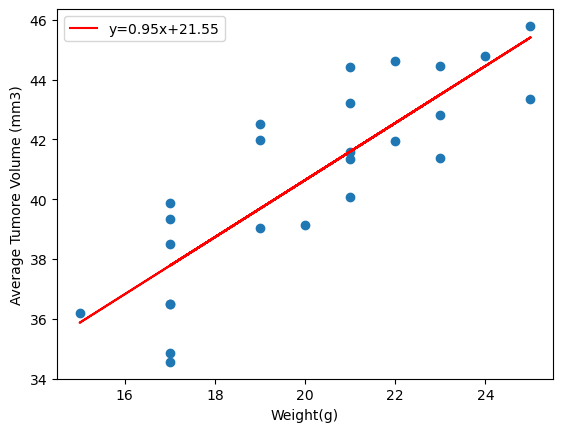

In [150]:
# Add the linear regression equation and line to the scatter plot
# calculate the the linear line plot list of values
line = slope*(avg_capom_df['Weight (g)'])+intercept
# create the scatter plot like above
plt.scatter(avg_capom_df['Weight (g)'],capavg['Tumor Volume (mm3)'])
# plot the linear regression line which is the averaged line of all the values in red
# i used the .format() function to create a label of the red line using the slope and intercept from above
plt.plot(avg_capom_df['Weight (g)'], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
# included legend with the redline slope formula using plt.legend()
plt.legend()
plt.savefig('linearregression')
plt.show()
